**Notes:** Press run, enter your preferred amazon product, and then enter your preffered # of topics: 





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
run in default mode (yes/no)
yes
run data collection? (yes/no)
yes
run topic model? (yes/no)
yes
enter your level (1-10)
HIGH GPU FOR LABELS>3
3
enter sleep time, .1s reccommended (3s for levels>10)
.3
enter your preferred # of topics for the topic model:
10
how many products would you like to analyze?
2
would you like to analyze positive or negative reviews? (positive/negative)
positive
min positive sentiment or max negative sentiment you would like to analyze, depending on the answer to your question above
-1 to 1, .2/-.2 reccomended, the more extreme the parameters the higher your level should be!
.1
enter the product type / brand reviews you would like to analyze
starbucks coffee pods
petes coffee pods
length of product pages collected: 1
***TOPIC MODEL FOR XXXXX PRODUCT/BRAND***
20
20
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Pa

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


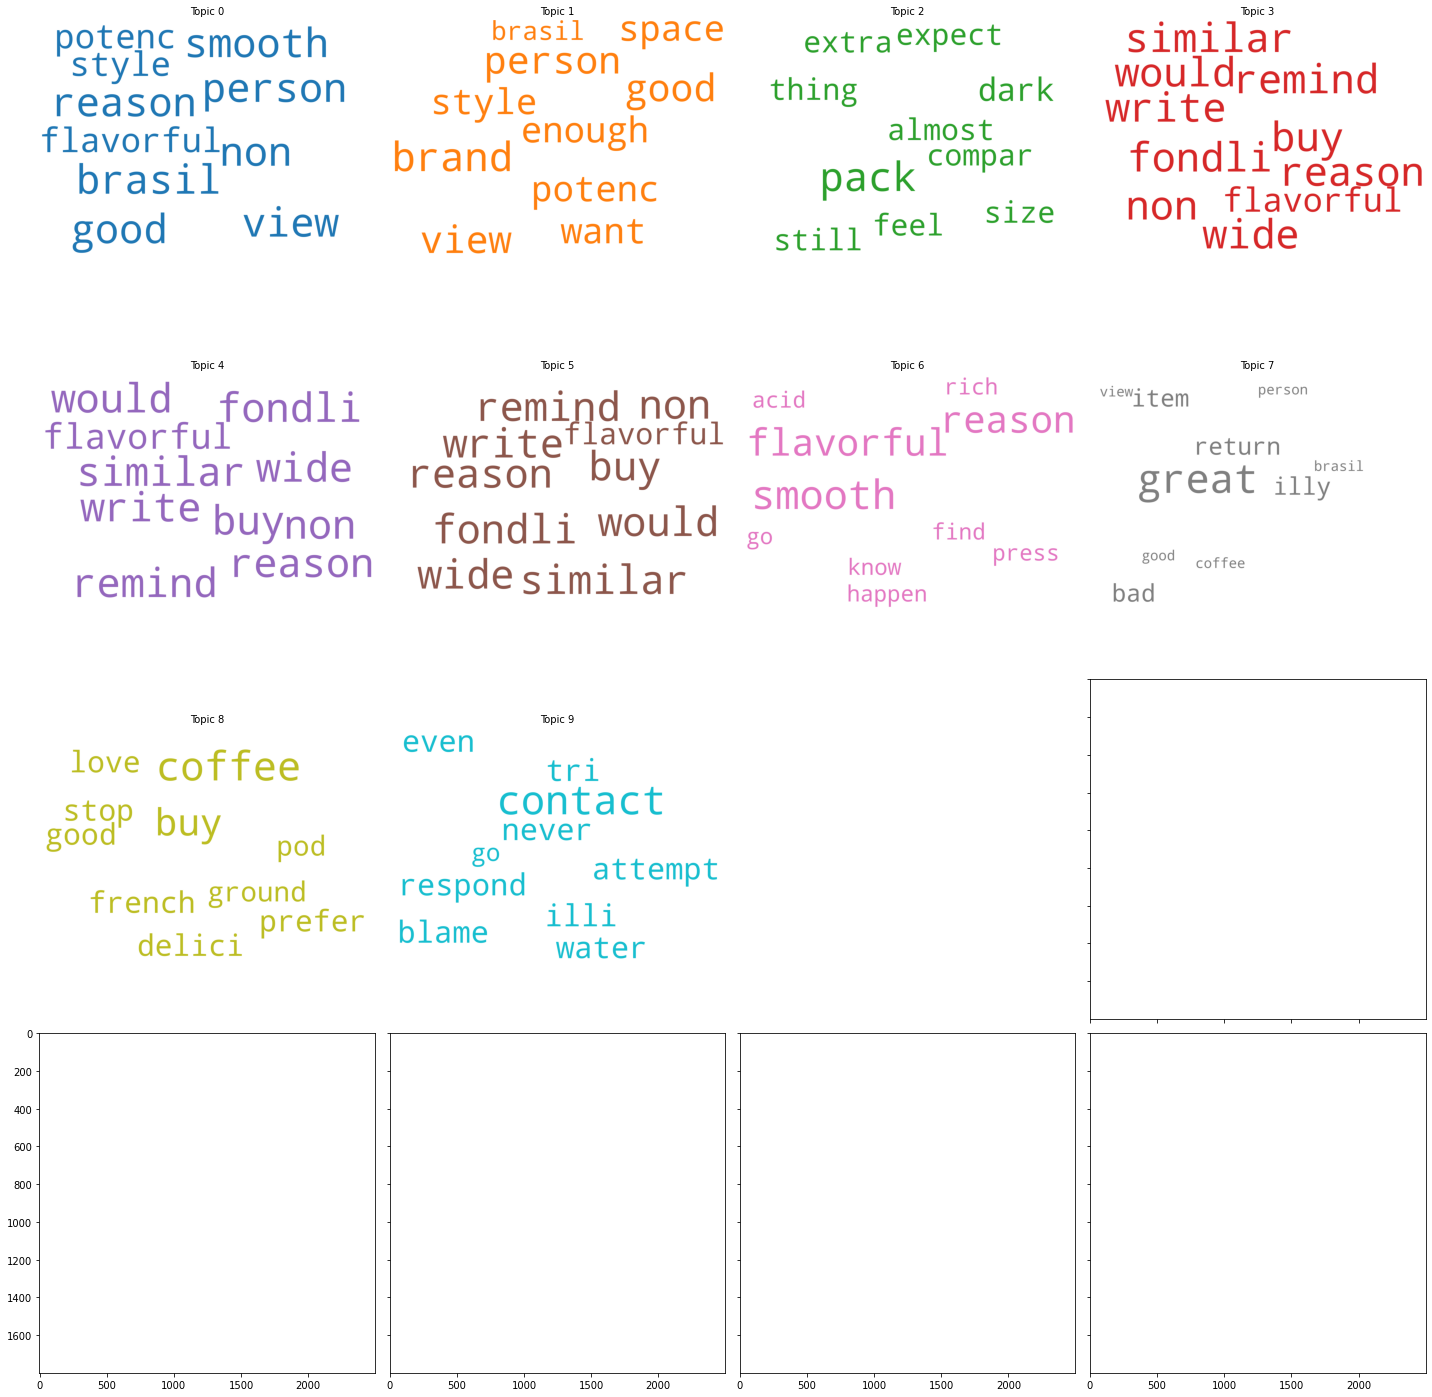

                                                                                                   reviews
0      i think the columbia blend is just terrible-sour and not drinkable. that’s why i deducted a star...
1      50% of the cups exploded (looks like bad seal) in the brewer. two attempts to contact illy but t...
2        50% of the cups exploded (looks like bad seal) in the brewer. two attempts to contact illy but...
3        i don't know what has happened to this coffee, but it has gone from being the richest,smoothes...
4        i think the columbia blend is just terrible-sour and not drinkable. that’s why i deducted a st...
5        i became a mega fan of illy when traveling to europe, and i love that my preferred airline ser...
6        i love illy coffee, when it's from an espresso machine or a really good french press. i bought...
7        i am sipping a cup of this coffee as i write this email! as one who has bought beans of single...
8        this is a great higher-end b

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


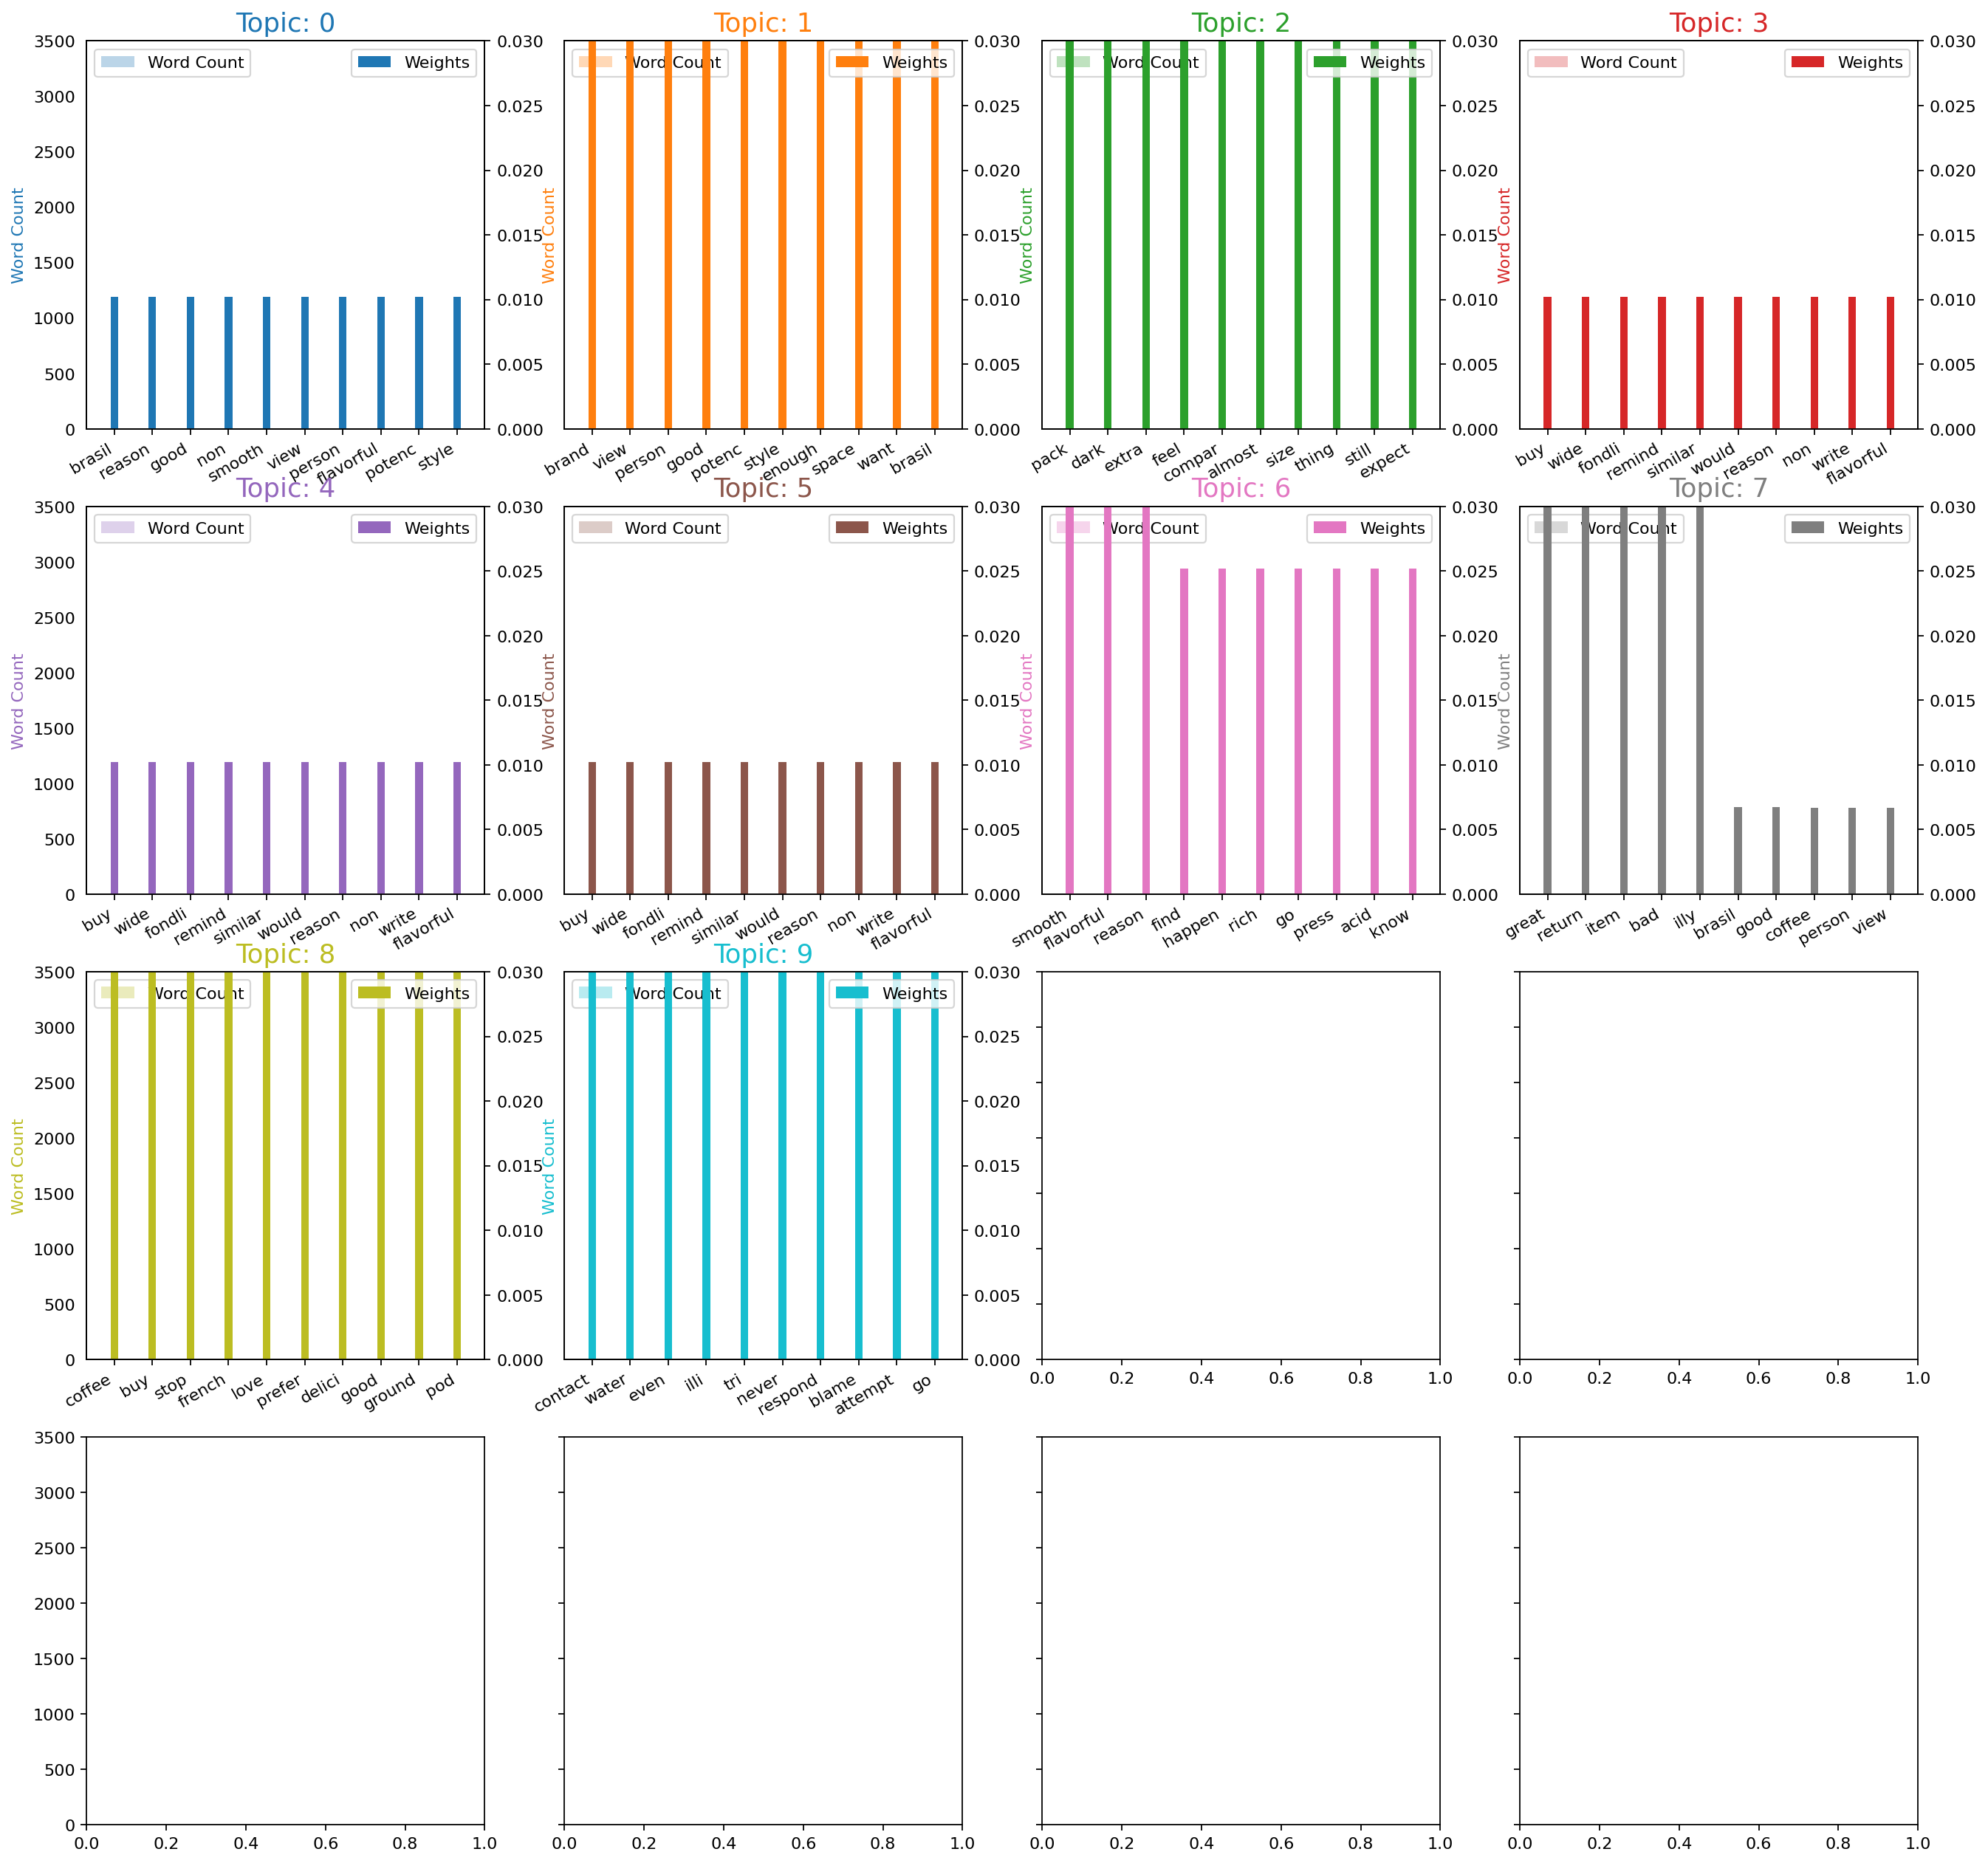

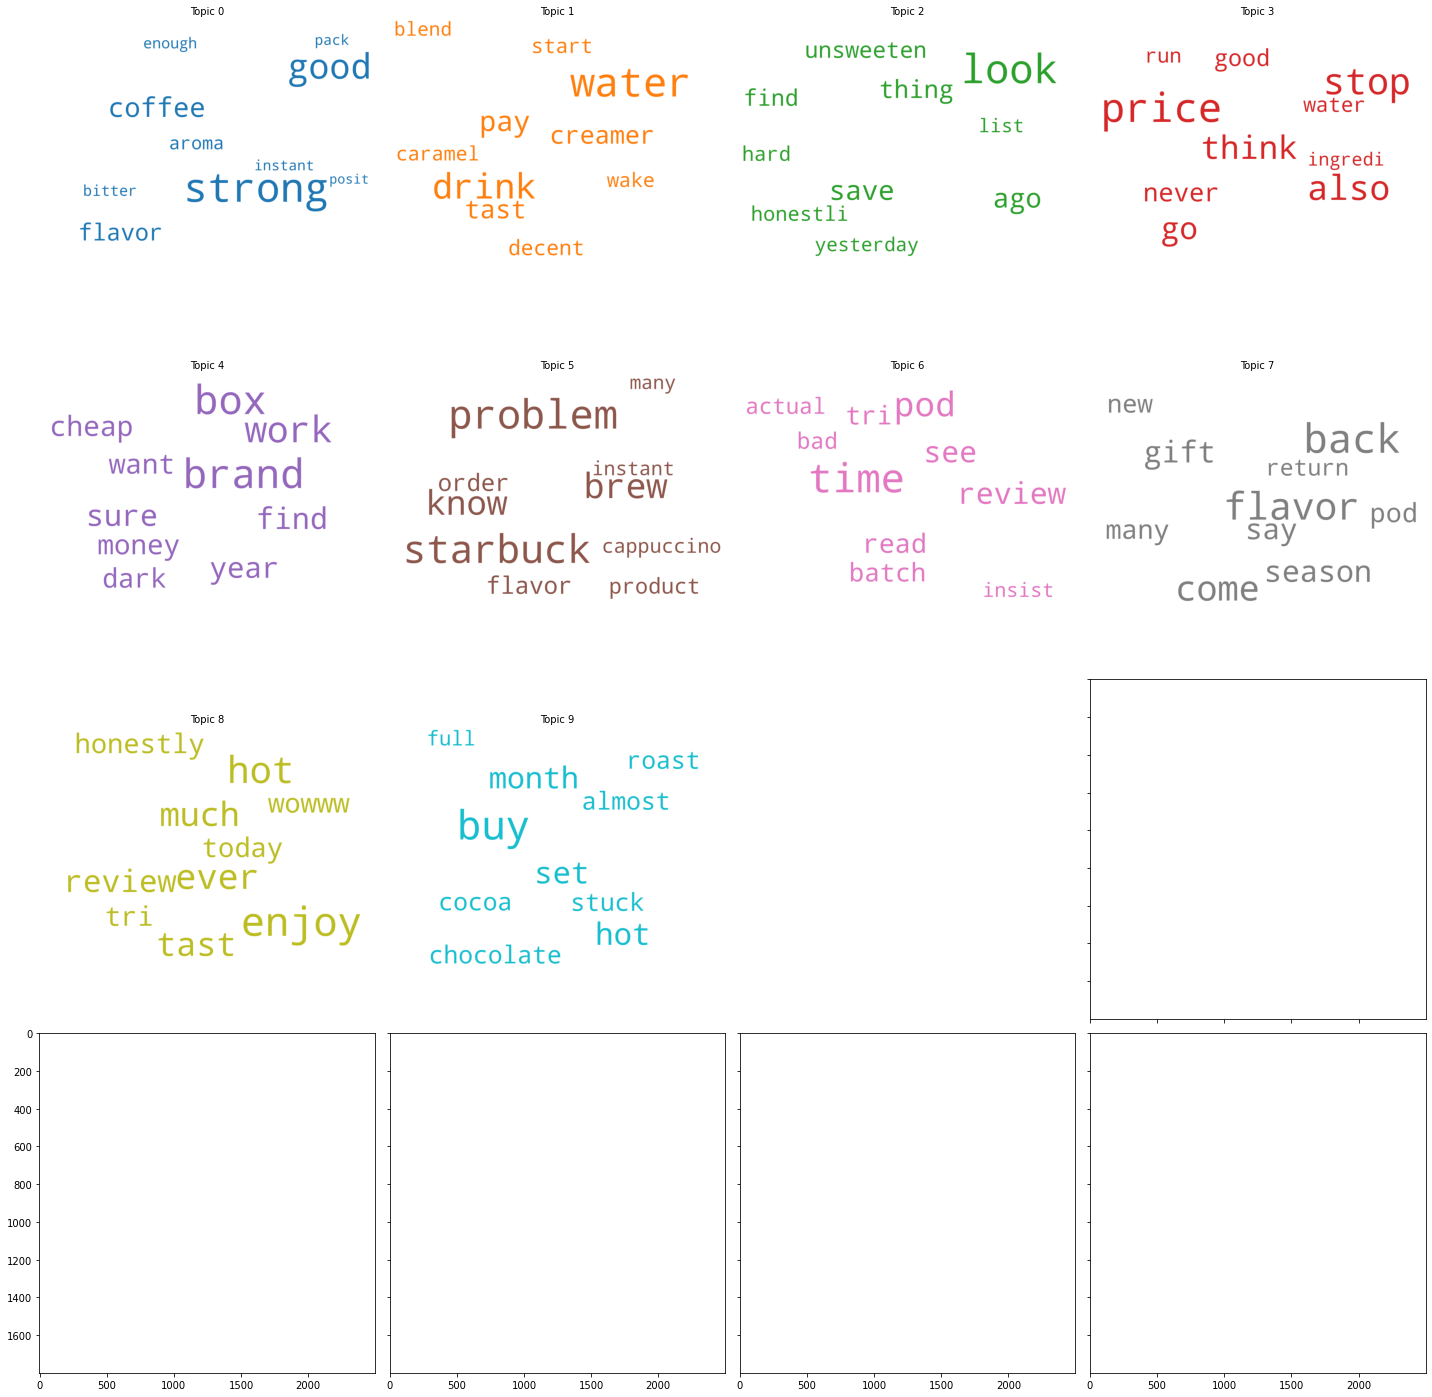

                                                                                                      reviews
0         if you like starbucks, you won't like this so you can quit reading.  i personally hate starbucks...
1         before you order, know that this is an instant cappuccino product, not a flavored coffee. also, ...
2           before you order, know that this is an instant cappuccino product, not a flavored coffee. also...
3           the true measure of a company is how the respond to their faithful customers when there is a p...
4         normally this coffee is some of the best we have used. however, this box was full (100%) of defe...
...                                                                                                       ...
78008609    i read a lot of the reviews before ordering and found, not surprisingly, that, like the old sa...
87633952    the box had been damaged and many of the k-cups were damaged beyond use.  i do not feel that b...
87633953  

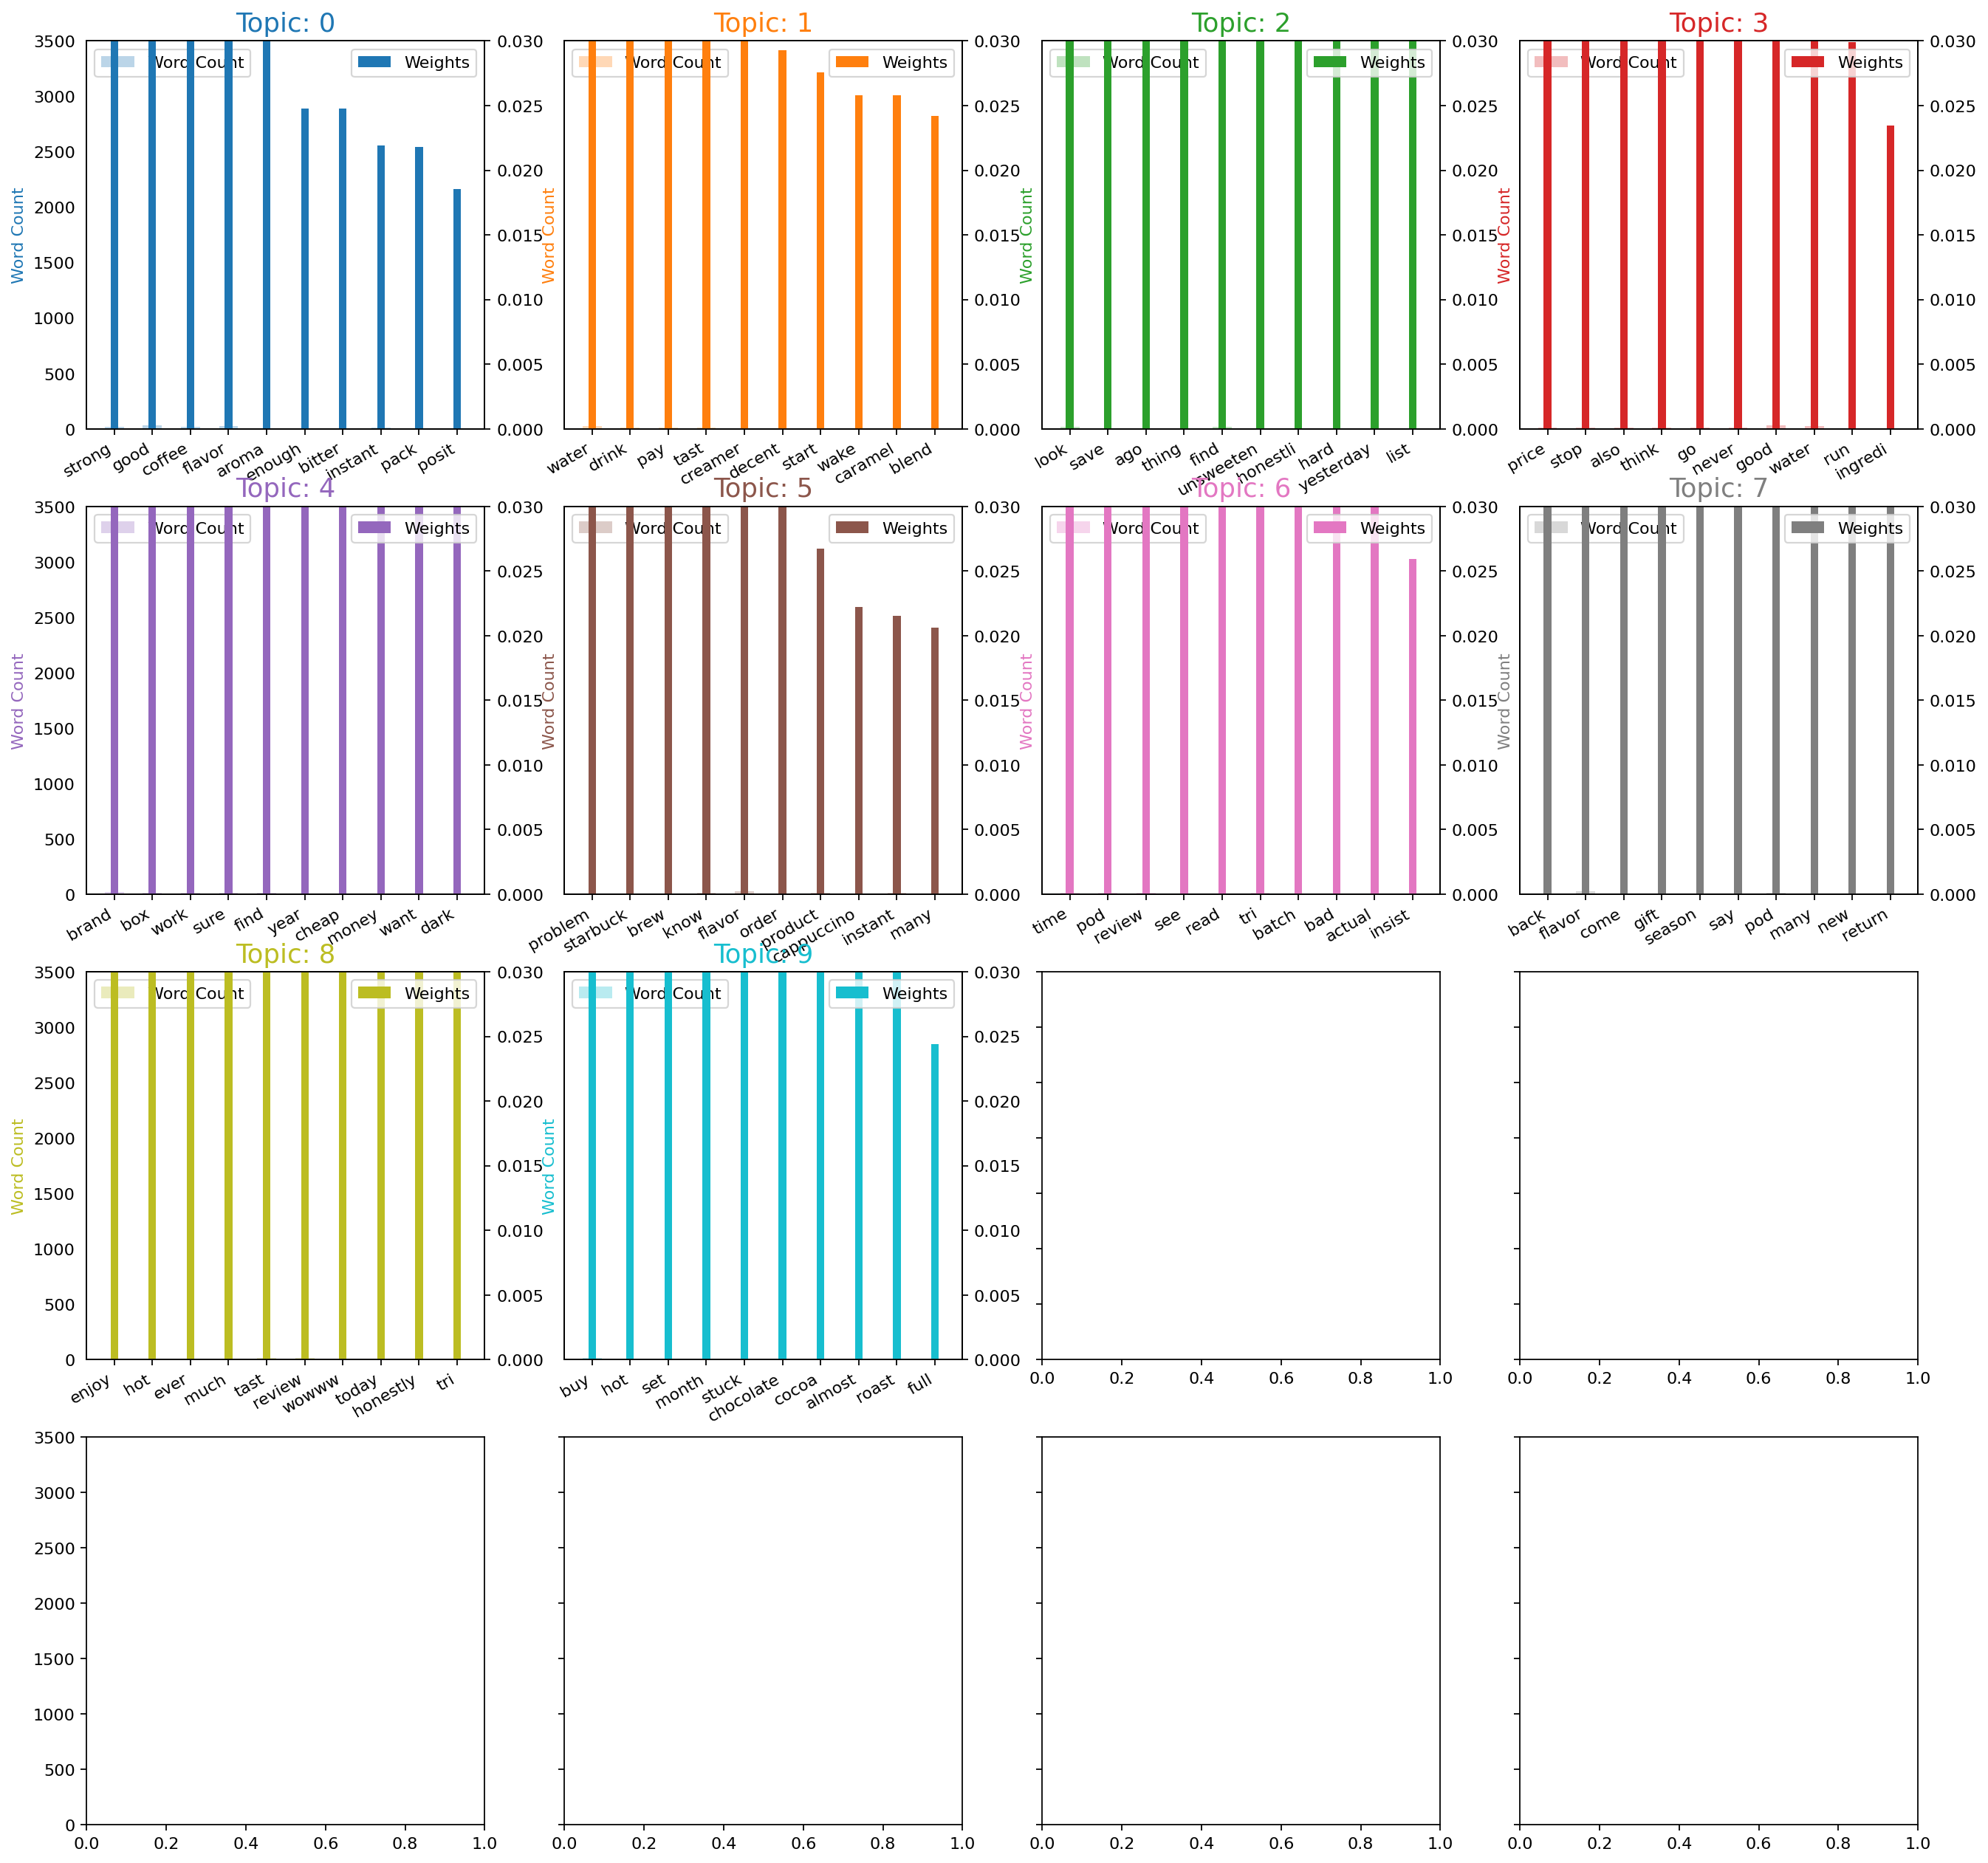

In [8]:
#PRODUCT SEARCH (BRAND V BRAND / SPECIFIC PRODUCTS)

#import packages 
import pandas as pd 
import numpy as np 
import requests 
import time 
import bs4
from bs4 import BeautifulSoup
import random
import re
import pandas as pd
import re
from gensim import corpora, models, similarities
import nltk
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

import gensim, spacy, logging, warnings
nlp = spacy.load('en_core_web_sm')
import gensim.corpora as corpora
from gensim.utils import  simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
from nltk.corpus import stopwords



#shared link: https://colab.research.google.com/drive/1LJoBqfg7phAfMmFsTX_-Ng0MPczdP7VS?usp=sharing

#set default
session_idd = '133-4548745-1768158'
tolkienn = 'gC7mBYiYr0wPDx4Vb2x0dOqscSt2lthl7BrUs/kAAAAMAAAAAGJMPnNyYXcAAAAA;hOx/eBw8vxCJNB4JXDJMg9v0vmKXJpJXaV0eNQNaK8unAAAAAGJMPnMAAAAB'


print('run in default mode (yes/no)')
default = input().lower()
if default == 'yes':
  session_id = session_idd
  tolkien = tolkienn
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  print('HIGH GPU FOR LABELS>3')
  level =int(input())
  print('enter sleep time, .1s reccommended (3s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())
  print('how many products would you like to analyze?')
  num_its = int(input())
  print('would you like to analyze positive or negative reviews? (positive/negative)')
  positiveOrNegative = input().lower()
  print('min positive sentiment or max negative sentiment you would like to analyze, depending on the answer to your question above')
  print('-1 to 1, .2/-.2 reccomended, the more extreme the parameters the higher your level should be!')
  higher_we_go = float(input())

else:
  print('enter your token (paste)')
  tolkien = input()
  print('enter your session id')
  session_id = input()
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  level = int(input())
  print('enter sleep time, .1s reccommended (3s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())

its = {'its':[]}
print('enter the product type / brand reviews you would like to analyze')
for x in range(num_its):
  its['its'].append(str(input()))

its = pd.DataFrame(its)


for xe in range(len(its)):
  saver = {'review':[],'title':[],'verified':[],'text':[]}
  uu = {'text':[]}
  ccc = {'text':[]}
  cc = {'text':[]}
  saverr = {'links':[]}
  cust_rev = {'id':[],'name':[],'link':[]}
  reviews = {'name':[],'id':[]}

  if data_collection =='yes':
    level = level*3
    
    for xzx in range(1):
      url = 'https://www.amazon.com/s?k='+str(its['its'][xe])+':&page='+str(xzx)
      headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36'}
      cookies = {'session-id':session_id,'session-id-time':'2082787201l','i18n-prefs':'USD','csm-hit':'tb:s-1KBXPV9W0G7AT013EMW9|1648478470844&t:1648478472672&adb:adblk_no','ubid-main':'132-0411939-8328406','session-token':tolkien}
      html = requests.get(url,headers = headers, cookies =cookies).text
      soup = bs4.BeautifulSoup(html, "html.parser")
      time.sleep(sleep_time)
      
      for tag in soup.findAll("div", {"class": "s-main-slot s-result-list s-search-results sg-row"}):
        xxxx = tag.findAll("a",{"class":"a-link-normal"})
        if len(xxxx)>=1:
          saverr['links'].append(xxxx)
        else:
          print(xxxx)
      print('length of product pages collected: '+str(len(saverr['links'])))
    from numpy.ma.core import exp
    for xc in range(len(str(saverr['links'][0]).split('" href="/'))):
      try:
        cust_rev['id'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[2])
        cust_rev['name'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[0])
      except:
        cvc = 2

    reviews = pd.DataFrame()
    reviews['id'] = pd.DataFrame(cust_rev['id']).drop_duplicates()
    reviews['name'] = pd.DataFrame(cust_rev['name']).drop_duplicates()
    reviews['link'] = pd.DataFrame(cust_rev['name']).drop_duplicates()
    reviews = reviews.reset_index().drop(columns = 'index')

    for xi in range(len(reviews)):
        reviews['link'].iloc[xi] = 'https://www.amazon.com/'+str(reviews['name'][xi])+'/product-reviews/'+str(reviews['id'][xi])+'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

    for xv in range(1):#len(reviews['link'])):
      for xvv in range(level*5):
          xvv = xvv+1
          html = requests.get(str(reviews['link'][xv])+'=all_reviews&pageNumber='+str(xvv),headers = headers, cookies =cookies).text
          soup = bs4.BeautifulSoup(html, "html.parser")
          time.sleep(sleep_time/2)




          for tag in soup.findAll("span", {"class": "a-size-base"}):
              xxxxx = tag.findNext().text
              if len(xxxxx)>=1:
                saver['text'].append(xxxxx)
              else:
                vvvv = 2

          for tag in soup.findAll("span", {"data-hook": "review-body"}):
              xxxxx = tag.findNext().text
              if len(xxxxx)>=1:
                saver['text'].append(xxxxx)
              else:
                vvvv = 2

          for x in range(len(saver['text'])):
            if len(str(saver['text'][x]).split())>=50:
              uu['text'].append(str(saver['text'][x]).lower())
            else:
              ff= 1
          for xx in range(len(uu['text'])):
            try:
              x = str(uu['text'][xx])
              cc['text'].append(re.sub('\n', '', x))
            except:
              fd = 2
          xt = 0

          #remove #'s to run below, filters out most updates / edits to posts, but takes a long time
          #try:
          for x in range(len(cc['text'])):
            #xt = xt+1 
            #if str(cc['text'][x]).split()[0] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[0] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[1] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[1] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[2] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[2] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[3] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[3] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[4] == 'edit:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[4] == 'edit':
              #ttt = 1
            #elif str(cc['text'][x]).split()[0] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[0] == 'update':
              #ttt = 1
            #elif str(cc['text'][x]).split()[1] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[1] == 'update':
              #ttt = 1
            #elif str(cc['text'][x]).split()[2] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[2] == 'update':
              #ttt = 1
            #elif str(cc['text'][x]).split()[3] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[3] == 'update':
              #ttt = 1
            #elif str(cc['text'][x]).split()[4] == 'update:':
              #ttt = 1
            #elif str(cc['text'][x]).split()[4] == 'update':
              #ttt = 1
            #else:
              ccc['text'].append(cc['text'][x])
          #except:
            #dfs = 1

    df_reviews = pd.DataFrame()
    df_reviews['reviews'] = pd.DataFrame(ccc['text']).drop_duplicates()
    df_sentence_reviews = {'sentences':[],'review_num':[]}
    for xc in range(len(df_reviews['reviews'])):
      try:
        dd = str(df_reviews['reviews'][xc]).split('.')
        dd1 = str(df_reviews['reviews'][xc+1]).split('.')
        dd2 = str(df_reviews['reviews'][xc+2]).split('.')
        dd3 = str(df_reviews['reviews'][xc+3]).split('.')
        for x in range(len(dd)):
          df_sentence_reviews['sentences'].append(str(dd[x])+str(dd1[x])+str(dd2[x])+str(dd3[x]))
          df_sentence_reviews['review_num'].append(str(xc))
      except:
        dfgs = 1
    df_sentence_reviews=pd.DataFrame(df_sentence_reviews)
  else:
    print('no data collection')

  if topicc_model =='yes':
    print('***TOPIC MODEL FOR XXXXX PRODUCT/BRAND***')
    #TOPIC MODEL
    stop = stopwords.words('english')
    st = PorterStemmer()
    stop_words=stopwords.words('english').append(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

    warnings.filterwarnings("ignore",category=DeprecationWarning)
    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
    df = pd.DataFrame()
    df['reviews.text'] = df_sentence_reviews.sentences.astype(str).apply(lambda x: " ".join(x.lower() for x in x.split())).apply(lambda x: " ".join(x for x in x.split() if x not in stop)).apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    def senti(x):
        return TextBlob(x).sentiment  
    df['senti_score'] = df['reviews.text'].astype(str).apply(senti)
    xx = []
    xy = []
    df_sentence_reviews = pd.DataFrame(df['reviews.text'])
    for x in range(len(df_sentence_reviews)):
      xx.append(str(df.senti_score[x]).split(',')[0].split('=')[1])
      xy.append(str(df.senti_score[x]).split(',')[1].split('=')[1].split(')')[0])
    print(len(xx))
    print(len(xy))
    df_sentence_reviews['sentiment'] = xx
    df_sentence_reviews['subjectivity'] = xy

    if positiveOrNegative == 'positive':
      df_sentence_reviews = df_sentence_reviews[df_sentence_reviews['sentiment'].astype(float)>=higher_we_go]
    else:
      df_sentence_reviews = df_sentence_reviews[df_sentence_reviews['sentiment'].astype(float)<=higher_we_go]

    df_sentence_reviews

    
    
    red_it = pd.DataFrame()
    red_it['personal_stories'] = df_sentence_reviews['reviews.text']
    red_it = pd.DataFrame(red_it['personal_stories'])

    #---------------------------------------------------------------------------------

    import gensim
    from gensim.utils import simple_preprocess
    import nltk
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use','www','https','com','fags','string','sleep','apnea','cpap','co','machine','get','getting'])
    def sent_to_words(sentences):
        for sentence in sentences:
            yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
    def remove_stopwords(texts):
        return [[word for word in simple_preprocess(str(doc)) 
                  if word not in stop_words] for doc in texts]
    data = red_it.personal_stories.values.tolist()
    data_words = list(sent_to_words(data))
    data_words = remove_stopwords(data_words)

    import gensim.corpora as corpora
    id2word = corpora.Dictionary(data_words)
    texts = data_words
    corpus = [id2word.doc2bow(text) for text in texts]
    from pprint import pprint
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=xcv)
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]


    #---------------------------------------------------------------------------------


    def sent_to_words(sentences):
        for sent in sentences:
            sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
            yield(sent)

    data = red_it.personal_stories.values.tolist()
    data_words = list(sent_to_words(data))
    print(data_words[:1])


    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)


    def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
        """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
        texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        texts = [bigram_mod[doc] for doc in texts]
        texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
        texts_out = []
        for sent in texts:
            doc = nlp(" ".join(sent)) 
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
        return texts_out

    data_ready = process_words(data_words)  


    #---------------------------------------------------------------------------------

    id2word = corpora.Dictionary(data_ready)

    corpus = [id2word.doc2bow(text) for text in data_ready]

    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=xcv, 
                                                random_state=100,
                                                update_every=1,
                                                chunksize=10,
                                                passes=10,
                                                alpha='symmetric',
                                                iterations=100,
                                                per_word_topics=True)


    #---------------------------------------------------------------------------------



    def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
        sent_topics_df = pd.DataFrame()

        for i, row_list in enumerate(ldamodel[corpus]):
            row = row_list[0] if ldamodel.per_word_topics else row_list            
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                else:
                    break
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
        return(sent_topics_df)


    df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    df_dominant_topic.head(10)



    pd.options.display.max_colwidth = 100

    sent_topics_sorteddf_mallet = pd.DataFrame()
    sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

    for i, grp in sent_topics_outdf_grpd:
        sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                                  grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                                axis=0)

    sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

    sent_topics_sorteddf_mallet.head(10)

    books_read = sent_topics_sorteddf_mallet

    #---------------------------------------------------------------------------------

    from matplotlib import pyplot as plt
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.colors as mcolors

    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=20,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)

    topics = lda_model.show_topics(formatted=False)

    fig, axes = plt.subplots(4, 4, figsize=(20,20), sharex=True, sharey=True)
    try:
      for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=xcv))
        plt.gca().axis('off')
    except:
        dffd = 1

    try:
      plt.subplots_adjust(wspace=0, hspace=0)
      plt.axis('off')
      plt.margins(x=0, y=0)
      plt.tight_layout()
      plt.show()
    except:
      dffd = 1

    #---------------------------------------------------------------------------------

    from collections import Counter
    topics = lda_model.show_topics(formatted=False)
    data_flat = [w for w_list in data_ready for w in w_list]
    counter = Counter(data_flat)

    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])

    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

    fig, axes = plt.subplots(4, 4, figsize=(20,20), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    try:
      for i, ax in enumerate(axes.flatten()):
          ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
          ax_twin = ax.twinx()
          ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
          ax.set_ylabel('Word Count', color=cols[i])
          ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
          ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
          ax.tick_params(axis='y', left=False)
          ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
          ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

      fig.tight_layout(w_pad=2)    
      fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)   
      plt.show()
      
    except:
      fwf = 1
  else:
    print('no topic model')

  print(df_reviews)


In [ ]:
df['reviews.text'] = df_sentence_reviews['reviews.text'].astype(str)
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
st = PorterStemmer()
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
def senti(x):
    return TextBlob(x).sentiment  
df['senti_score'] = df['reviews.text'].apply(senti)
xx = []
xy = []
df_sentence_reviews = pd.DataFrame(df['reviews.text'])
for x in range(len(df_sentence_reviews)):
  xx.append(str(df.senti_score[x]).split(',')[0].split('=')[1])
  xy.append(str(df.senti_score[x]).split(',')[1].split('=')[1].split(')')[0])
print(len(xx))
print(len(xy))
df_sentence_reviews['sentiment'] = xx
df_sentence_reviews['subjectivity'] = xy

print('would you like to analyze positive or negative reviews? (positive/negative)')
positiveOrNegative = input().lower()
print('min positive sentiment or max negative sentiment you would like to analyze, depending on the answer to your question above')
print('-1 to 1, .2/-.2 reccomended, the more extreme the parameters the higher your level should be!')
higher_we_go = int(input())
if positiveOrNegative == 'positive':
  df_sentence_reviews = df_sentence_reviews[df_sentence_reviews['sentiment'].astype(float)>=higher_we_go]
else:
  df_sentence_reviews = df_sentence_reviews[df_sentence_reviews['sentiment'].astype(float)<=higher_we_go]

df_sentence_reviews

AttributeError: ignored

In [ ]:
df['reviews.text']

0                                                                                                     NaN
1     clean regularli use daili nespresso brand capsul clean regularli use daili nespresso brand capsu...
2     saw pass deal, $ saw pass deal, $ piti hope possibl enjoy food coff lower price nespresso seriou...
3                                                                                                     NaN
4                                                                                   75 $75 $ much lighter
                                                     ...                                                 
95    decid enough posit review give shot one cup abl squeez pretti good flavor work machin qualiti co...
96                                                                                                    NaN
97    tri pierc foil manual put machin let' ground machin clog cup well first problem number capsul fo...
98                                            

100
100


,reviews.text,sentiment,subjectivity
0,we've had our nespresso for a decade with no issues we've had our nespresso for a decade with n...,0.0,0.05
1,we clean it regularly and have used it daily with nespresso brand capsules we clean it regula...,0.24444444444444446,0.55
2,"we saw these and couldn't pass up the deal, $ we saw these and couldn't pass up the deal, $ t...",0.12333333333333334,0.37333333333333335
3,"33 compared to $33 compared to $ when the coffee started to dispense, i noticed a significant co...",0.0,0.0
4,75 or $75 or $ much lighter,0.2,0.2
...,...,...,...
95,i decided there were enough positive reviews to give them a shot and the one cup i was able to ...,0.25,0.44000000000000006
96,the foil on top doesn't pierce in the machine so back pressure builds up and makes water leak a...,0.0,0.4375
97,i tried piercing the foil manually before putting in the machine but that let's grounds through...,0.475,0.4666666666666667
98,"also, the back or bottom of capsule has it's own 'vents' that open but they dont align with the...",0.06666666666666667,0.3458333333333334


,reviews.text
0,we've had our nespresso for a decade with no issues we've had our nespresso for a decade with n...
1,we clean it regularly and have used it daily with nespresso brand capsules we clean it regula...
2,"we saw these and couldn't pass up the deal, $ we saw these and couldn't pass up the deal, $ t..."
3,"33 compared to $33 compared to $ when the coffee started to dispense, i noticed a significant co..."
4,75 or $75 or $ much lighter
...,...
95,i decided there were enough positive reviews to give them a shot and the one cup i was able to ...
96,the foil on top doesn't pierce in the machine so back pressure builds up and makes water leak a...
97,i tried piercing the foil manually before putting in the machine but that let's grounds through...
98,"also, the back or bottom of capsule has it's own 'vents' that open but they dont align with the..."


In [ ]:
sdf['dd']

0     we've had our nespresso for a decade with no issues  we've had our nespresso for a decade with n...
1       we clean it regularly and have used it daily with nespresso brand capsules  we clean it regula...
2       we saw these and couldn't pass up the deal, $  we saw these and couldn't pass up the deal, $ t...
3     33 compared to $33 compared to $ when the coffee started to dispense, i noticed a significant co...
4                                                                             75 or $75 or $ much lighter
                                                     ...                                                 
95     i decided there were enough positive reviews to give them a shot and the one cup i was able to ...
96     the foil on top doesn't pierce in the machine so back pressure builds up and makes water leak a...
97     i tried piercing the foil manually before putting in the machine but that let's grounds through...
98     also, the back or bottom of capsule has

In [ ]:
len(df_sentence_reviews.sentences)

118

In [ ]:
#import packages 
import pandas as pd 
import numpy as np 
import requests 
import time 
import bs4
from bs4 import BeautifulSoup
import random
import re

#shared link: https://colab.research.google.com/drive/1LJoBqfg7phAfMmFsTX_-Ng0MPczdP7VS?usp=sharing

#set default
session_idd = '132-9175929-1227644'
tolkienn = 'ZeucQ3BN0LOLP+CsvILZAlMW+TYX0HrsjLnkSK7iWMe8nmyie4YKkvi4E1E0GGP5n4dy72gLt2eLdYgQdQwBQH3XrH4gnXUTYa5xAV22asPAthhmzrzZF+lJrFkuQat5+sJq2QqG3rqCQAR0zTo/oUX2HextqvZd46uYHtVvVxtmnwCRqn9SmaeQQ6qsImC3'


print('run in default mode (yes/no)')
default = input().lower()
if default == 'yes':
  session_id = session_idd
  tolkien = tolkienn
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  print('HIGH GPU FOR LABELS>3')
  level =int(input())
  print('enter sleep time (must be an integer), 1s reccommended (5s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())
else:
  print('enter your token (paste)')
  tolkien = input()
  print('enter your session id')
  session_id = input()
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  level = int(input())
  print('enter sleep time (must be an integer), 1s reccommended (5s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())

saver = {'review':[],'title':[],'verified':[],'text':[]}
uu = {'text':[]}
ccc = {'text':[]}
cc = {'text':[]}
saverr = {'links':[]}
cust_rev = {'id':[],'name':[],'link':[]}
reviews = {'name':[],'id':[]}


if data_collection =='yes':
  level = level*3
  print('enter the product type / brand reviews you would like to analyze')
  sss = str(input())
  for xzx in range(2):
    url = 'https://www.amazon.com/s?k='+sss+':&page='+str(xzx)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36'}
    cookies = {'session-id':session_id,'session-id-time':'2082787201l','i18n-prefs':'USD','csm-hit':'tb:s-1KBXPV9W0G7AT013EMW9|1648478470844&t:1648478472672&adb:adblk_no','ubid-main':'132-0411939-8328406','session-token':tolkien}
    html = requests.get(url,headers = headers, cookies =cookies).text
    soup = bs4.BeautifulSoup(html, "html.parser")
    time.sleep(sleep_time)
    
    for tag in soup.findAll("div", {"class": "s-main-slot s-result-list s-search-results sg-row"}):
      xxxx = tag.findAll("a",{"class":"a-link-normal"})
      if len(xxxx)>=1:
        saverr['links'].append(xxxx)
      else:
        print(xxxx)
    print('length of product pages collected: '+str(len(saverr['links'])))
  from numpy.ma.core import exp
  for xc in range(len(str(saverr['links'][0]).split('" href="/'))):
    try:
      cust_rev['id'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[2])
      cust_rev['name'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[0])
    except:
      cvc = 2

  reviews = pd.DataFrame()
  reviews['id'] = pd.DataFrame(cust_rev['id']).drop_duplicates()
  reviews['name'] = pd.DataFrame(cust_rev['name']).drop_duplicates()
  reviews['link'] = pd.DataFrame(cust_rev['name']).drop_duplicates()
  reviews = reviews.reset_index().drop(columns = 'index')

  for xi in range(len(reviews)):
      reviews['link'].iloc[xi] = 'https://www.amazon.com/'+str(reviews['name'][xi])+'/product-reviews/'+str(reviews['id'][xi])+'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

  for xv in range(len(reviews['link'])):
    for xvv in range(level*3):
        xvv = xvv+1
        html = requests.get(str(reviews['link'][xv])+'=all_reviews&pageNumber='+str(xvv),headers = headers, cookies =cookies).text
        soup = bs4.BeautifulSoup(html, "html.parser")
        time.sleep(sleep_time/2)




        for tag in soup.findAll("span", {"class": "a-size-base"}):
            xxxxx = tag.findNext().text
            if len(xxxxx)>=1:
              saver['text'].append(xxxxx)
            else:
              vvvv = 2

        for tag in soup.findAll("span", {"data-hook": "review-body"}):
            xxxxx = tag.findNext().text
            if len(xxxxx)>=1:
              saver['text'].append(xxxxx)
            else:
              vvvv = 2

        for x in range(len(saver['text'])):
          if len(str(saver['text'][x]).split())>=50:
            uu['text'].append(str(saver['text'][x]).lower())
          else:
            ff= 1
        for xx in range(len(uu['text'])):
          try:
            x = str(uu['text'][xx])
            cc['text'].append(re.sub('\n', '', x))
          except:
            fd = 2
        xt = 0

        #remove #'s to run below, filters out most updates / edits to posts, but takes a long time
        #try:
        for x in range(len(cc['text'])):
          #xt = xt+1 
          #if str(cc['text'][x]).split()[0] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'update':
            #ttt = 1
          #else:
            ccc['text'].append(cc['text'][x])
        #except:
          #dfs = 1

  df_reviews = pd.DataFrame()
  df_reviews['reviews'] = pd.DataFrame(ccc['text']).drop_duplicates()
  df_sentence_reviews = {'sentences':[],'review_num':[]}
  for xc in range(len(df_reviews['reviews'])):
    try:
      dd = str(df_reviews['reviews'][xc]).split('.')
      dd1 = str(df_reviews['reviews'][xc+1]).split('.')
      dd2 = str(df_reviews['reviews'][xc+2]).split('.')
      dd3 = str(df_reviews['reviews'][xc+3]).split('.')
      for x in range(len(dd)):
        df_sentence_reviews['sentences'].append(str(dd[x])+str(dd1[x])+str(dd2[x])+str(dd3[x]))
        df_sentence_reviews['review_num'].append(str(xc))
    except:
      dfgs = 1
  df_sentence_reviews=pd.DataFrame(df_sentence_reviews)
else:
  print('no data collection')

if topicc_model =='yes':
  print('***TOPIC MODEL FOR XXXXX PRODUCT/BRAND***')
  #TOPIC MODEL
  import pandas as pd
  import re
  from gensim import corpora, models, similarities
  import nltk
  from nltk.corpus import stopwords
  import numpy as np
  import pandas as pd
  import sys
  # !{sys.executable} -m spacy download en
  import re, numpy as np, pandas as pd
  from pprint import pprint

  import gensim, spacy, logging, warnings
  nlp = spacy.load('en_core_web_sm')
  import gensim.corpora as corpora
  from gensim.utils import  simple_preprocess
  from gensim.models import CoherenceModel
  import matplotlib.pyplot as plt

  from nltk.corpus import stopwords
  stop_words=['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come']

  warnings.filterwarnings("ignore",category=DeprecationWarning)
  logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
  red_it = pd.DataFrame()
  red_it['personal_stories'] = df_sentence_reviews['sentences']
  red_it = pd.DataFrame(red_it['personal_stories'])

  #---------------------------------------------------------------------------------

  import gensim
  from gensim.utils import simple_preprocess
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stop_words = stopwords.words('english')
  stop_words.extend(['from', 'subject', 're', 'edu', 'use','www','https','com','fags','string','sleep','apnea','cpap','co','machine','get','getting'])
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) 
                if word not in stop_words] for doc in texts]
  data = red_it.personal_stories.values.tolist()
  data_words = list(sent_to_words(data))
  data_words = remove_stopwords(data_words)

  import gensim.corpora as corpora
  id2word = corpora.Dictionary(data_words)
  texts = data_words
  corpus = [id2word.doc2bow(text) for text in texts]
  from pprint import pprint
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=xcv)
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]


  #---------------------------------------------------------------------------------


  def sent_to_words(sentences):
      for sent in sentences:
          sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
          yield(sent)

  data = red_it.personal_stories.values.tolist()
  data_words = list(sent_to_words(data))
  print(data_words[:1])


  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)


  def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
      texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
      texts = [bigram_mod[doc] for doc in texts]
      texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
      return texts_out

  data_ready = process_words(data_words)  


  #---------------------------------------------------------------------------------

  id2word = corpora.Dictionary(data_ready)

  corpus = [id2word.doc2bow(text) for text in data_ready]

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=xcv, 
                                              random_state=100,
                                              update_every=1,
                                              chunksize=10,
                                              passes=10,
                                              alpha='symmetric',
                                              iterations=100,
                                              per_word_topics=True)


  #---------------------------------------------------------------------------------



  def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
      sent_topics_df = pd.DataFrame()

      for i, row_list in enumerate(ldamodel[corpus]):
          row = row_list[0] if ldamodel.per_word_topics else row_list            
          row = sorted(row, key=lambda x: (x[1]), reverse=True)
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0:
                  wp = ldamodel.show_topic(topic_num)
                  topic_keywords = ", ".join([word for word, prop in wp])
                  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                  break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


  df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

  df_dominant_topic = df_topic_sents_keywords.reset_index()
  df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
  df_dominant_topic.head(10)



  pd.options.display.max_colwidth = 100

  sent_topics_sorteddf_mallet = pd.DataFrame()
  sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

  for i, grp in sent_topics_outdf_grpd:
      sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                                grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                              axis=0)

  sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

  sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

  sent_topics_sorteddf_mallet.head(10)

  books_read = sent_topics_sorteddf_mallet

  #---------------------------------------------------------------------------------

  from matplotlib import pyplot as plt
  from wordcloud import WordCloud, STOPWORDS
  import matplotlib.colors as mcolors

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=stop_words,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=20,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = lda_model.show_topics(formatted=False)

  fig, axes = plt.subplots(4, 4, figsize=(20,20), sharex=True, sharey=True)
  try:
    for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')
  except:
      dffd = 1

  try:
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
  except:
    dffd = 1

  #---------------------------------------------------------------------------------

  from collections import Counter
  topics = lda_model.show_topics(formatted=False)
  data_flat = [w for w_list in data_ready for w in w_list]
  counter = Counter(data_flat)

  out = []
  for i, topic in topics:
      for word, weight in topic:
          out.append([word, i , weight, counter[word]])

  df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

  fig, axes = plt.subplots(4, 4, figsize=(20,20), sharey=True, dpi=160)
  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
  try:
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)   
    plt.show()
  except:
    fwf = 1
else:
  print('no topic model')

df_reviews


run in default mode (yes/no)
yes
run data collection? (yes/no)
yes
run topic model? (yes/no)
yes
enter your level (1-10)
HIGH GPU FOR LABELS>3
3
enter sleep time (must be an integer), 1s reccommended (5s for levels>10)
3
enter your preferred # of topics for the topic model:
10
enter the product type / brand reviews you would like to analyze
apple airpods
length of product pages collected: 1
length of product pages collected: 2


In [ ]:
'https://www.amazon.com/'+str(reviews['name'][xi])+'/product-reviews/'+str(reviews['id'][xi])+'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

'https://www.amazon.com/Qietopeb-Joggers-Sweatpants-Athletic-Workout/product-reviews/B09Q6BXXTY/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [ ]:
cust_rev = pd.DataFrame(cust_rev['name'])

In [ ]:
cust_rev[0][2]

'GYM-PEOPLE-Loose-fit-Sweatpants-Lined-Black'

In [ ]:
df_sentence_reviews

,sentences,review_num
0,these little things pack one hell of a punch!apple’s new noise cancellation and transparency mod...,0
1,"yes others may have used similar technology before, but apple’s simplistic ui made for the airp...",0
2,"coming from the first generation airpods, the experience is like night and day",0
3,"even though the airpods themselves are heavier, they feel lighter in the ears and much more com...",0
4,"the audio quality is insane, and this quality is only amplified by apple’s new spatial audio",0
...,...,...
155,i tried all the methods i can find online but nothing worked,146
156,my other earbuds from jabra don't look as good as airpods but more reliable (almost never dropp...,146
157,"i guess they are typical apple products; looking good but low quality, and break down fast",146
158,i am glad i can return,146


In [ ]:
len(pd.DataFrame(cc['text']).drop_duplicates())

34

In [ ]:
yes


In [ ]:
df_reviews = pd.DataFrame()
df_reviews['reviews'] = ['hello. my name is will. i like lacrosse. i am in class.','hello. my name is will. i like lacrosse. i am in class.','hello. my name is will. i like lacrosse. i am in class.']

In [ ]:
import pandas as pd
df_reviews

,reviews
0,hello. my name is will. i like lacrosse. i am ...
1,hello. my name is will. i like lacrosse. i am ...
2,hello. my name is will. i like lacrosse. i am ...


In [ ]:

df_sentence_reviews=pd.DataFrame(df_sentence_reviews)

In [ ]:
df_sentence_reviews

,sentences,review_num
0,hello,0
1,my name is will,0
2,i like lacrosse,0
3,i am in class,0
4,,0
5,hello,1
6,my name is will,1
7,i like lacrosse,1
8,i am in class,1
9,,1


In [ ]:
#import packages
import pandas as pd
import numpy as np
import requests
import time
import bs4
from bs4 import BeautifulSoup
import random
import re

#shared link: https://colab.research.google.com/drive/1LJoBqfg7phAfMmFsTX_-Ng0MPczdP7VS?usp=sharing

#set default
session_idd = '132-9175929-1227644'
tolkienn = 'gJyDLjpbomezzfMa38sGxKQL4hFezB9Ete1MLEepKBdmkw2/yodZrKRI5vFkc/cW8w6nBbT3xzfQY6YGDRMUDh3bMQictuBgED7yNzjOoY93osg2vtbaB4RCxnlIMFIz+cRYhvFPpziQsgw+GsAFmKHjjd/wXtTRklkPsUT/XE2XxFlLUkeeE5eqiyEUCt59;csm-hit=tb:s-7Z3VSTXFGG2AM2VVR7V3|1648484703426&t:1648484706492&adb'


print('run in default mode (yes/no)')
default = input().lower()
if default == 'yes':
  session_id = session_idd
  tolkien = tolkienn
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  print('HIGH GPU FOR LABELS>3')
  level =int(input())
  print('enter sleep time (must be an integer), 1s reccommended (5s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())
else:
  print('enter your token (paste)')
  tolkien = input()
  print('enter your session id')
  session_id = input()
  print('run data collection? (yes/no)')
  data_collection = input().lower()
  print('run topic model? (yes/no)')
  topicc_model = input().lower()
  print('enter your level (1-10)')
  level = int(input())
  print('enter sleep time (must be an integer), 1s reccommended (5s for levels>10)')
  sleep_time = float(input())
  print('enter your preferred # of topics for the topic model:')
  xcv = int(input())

saver = {'review':[],'title':[],'verified':[],'text':[]}
uu = {'text':[]}
ccc = {'text':[]}
cc = {'text':[]}
saverr = {'links':[]}
cust_rev = {'id':[],'name':[],'link':[]}
reviews = {'name':[],'id':[]}


if data_collection =='yes':
  level = level*3
  print('enter the product type / brand reviews you would like to analyze')
  sss = str(input())
  for xzx in range(level):
    url = 'https://www.amazon.com/s?k='+sss+':&page='+str(xzx)
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.83 Safari/537.36'}
    cookies = {'session-id':session_id,'session-id-time':'2082787201l','i18n-prefs':'USD','csm-hit':'tb:s-1KBXPV9W0G7AT013EMW9|1648478470844&t:1648478472672&adb:adblk_no','ubid-main':'132-0411939-8328406','session-token':tolkien}
    html = requests.get(url,headers = headers, cookies =cookies).text
    soup = bs4.BeautifulSoup(html, "html.parser")
    time.sleep(sleep_time)
    
    for tag in soup.findAll("div", {"class": "s-main-slot s-result-list s-search-results sg-row"}):
      xxxx = tag.findAll("a",{"class":"a-link-normal"})
      if len(xxxx)>=1:
        saverr['links'].append(xxxx)
      else:
        print(xxxx)
    print('length of product pages collected: '+str(len(saverr['links'])))
  from numpy.ma.core import exp
  for xc in range(len(str(saverr['links'][0]).split('" href="/'))):
    try:
      cust_rev['id'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[2])
      cust_rev['name'].append(str(saverr['links'][0]).split(';url=%2F')[xc].split('%2F')[0])
    except:
      cvc = 2

  reviews = pd.DataFrame()
  reviews['id'] = cust_rev['id']
  reviews['name'] = cust_rev['name']

  for xi in range(len(reviews)):
      cust_rev['link'].append('https://www.amazon.com/'+str(reviews['name'][xi])+'/product-reviews/'+str(reviews['id'][xi])+'/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews')
  review_links = pd.DataFrame(cust_rev)

  for xv in range(len(review_links['link'])):
    for xvv in range(level):
        xvv = xvv+1
        html = requests.get(str(review_links['link'][xv])+'=all_reviews&pageNumber='+str(xvv),headers = headers, cookies =cookies).text
        soup = bs4.BeautifulSoup(html, "html.parser")
        time.sleep(sleep_time)



        for tag in soup.findAll("span", {"class": "a-size-base"}):
            xxxxx = tag.findNext().text
            if len(xxxxx)>=1:
              saver['text'].append(xxxxx)
            else:
              vvvv = 2

        for tag in soup.findAll("span", {"data-hook": "review-body"}):
            xxxxx = tag.findNext().text
            if len(xxxxx)>=1:
              saver['text'].append(xxxxx)
            else:
              vvvv = 2

        for x in range(len(saver['text'])):
          if len(str(saver['text'][x]).split())>=100:
            uu['text'].append(str(saver['text'][x]).lower())
          else:
            ff= 1
        for xx in range(len(uu['text'])):
          try:
            x = str(uu['text'][xx])
            cc['text'].append(re.sub('\n', '', x))
          except:
            fd = 2
        xt = 0

        #remove #'s to run below, filters out most updates / edits to posts, but takes a long time
        #try:
        for x in range(len(cc['text'])):
          #xt = xt+1 
          #if str(cc['text'][x]).split()[0] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'edit:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'edit':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[0] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[1] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[2] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[3] == 'update':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'update:':
            #ttt = 1
          #elif str(cc['text'][x]).split()[4] == 'update':
            #ttt = 1
          #else:
            ccc['text'].append(cc['text'][x])
        #except:
          #dfs = 1

  df_reviews = pd.DataFrame()
  df_reviews['reviews'] = pd.DataFrame(ccc['text']).drop_duplicates()
else:
  print('no data collection')

if topicc_model =='yes':
  #TOPIC MODEL
  import pandas as pd
  import re
  from gensim import corpora, models, similarities
  import nltk
  from nltk.corpus import stopwords
  import numpy as np
  import pandas as pd
  import sys
  # !{sys.executable} -m spacy download en
  import re, numpy as np, pandas as pd
  from pprint import pprint

  import gensim, spacy, logging, warnings
  nlp = spacy.load('en_core_web_sm')
  import gensim.corpora as corpora
  from gensim.utils import  simple_preprocess
  from gensim.models import CoherenceModel
  import matplotlib.pyplot as plt

  from nltk.corpus import stopwords
  stop_words=['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come']

  warnings.filterwarnings("ignore",category=DeprecationWarning)
  logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
  red_it = pd.DataFrame()
  red_it['personal_stories'] = df_reviews['reviews']
  red_it = pd.DataFrame(red_it['personal_stories'])

  #---------------------------------------------------------------------------------

  import gensim
  from gensim.utils import simple_preprocess
  import nltk
  nltk.download('stopwords')
  from nltk.corpus import stopwords
  stop_words = stopwords.words('english')
  stop_words.extend(['from', 'subject', 're', 'edu', 'use','www','https','com','fags','string','sleep','apnea','cpap','co','machine','get','getting'])
  def sent_to_words(sentences):
      for sentence in sentences:
          yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
  def remove_stopwords(texts):
      return [[word for word in simple_preprocess(str(doc)) 
                if word not in stop_words] for doc in texts]
  data = red_it.personal_stories.values.tolist()
  data_words = list(sent_to_words(data))
  data_words = remove_stopwords(data_words)

  import gensim.corpora as corpora
  id2word = corpora.Dictionary(data_words)
  texts = data_words
  corpus = [id2word.doc2bow(text) for text in texts]
  from pprint import pprint
  lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                          id2word=id2word,
                                          num_topics=xcv)
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]


  #---------------------------------------------------------------------------------


  def sent_to_words(sentences):
      for sent in sentences:
          sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
          yield(sent)

  data = red_it.personal_stories.values.tolist()
  data_words = list(sent_to_words(data))
  print(data_words[:1])


  bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
  trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
  bigram_mod = gensim.models.phrases.Phraser(bigram)
  trigram_mod = gensim.models.phrases.Phraser(trigram)


  def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
      """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
      texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
      texts = [bigram_mod[doc] for doc in texts]
      texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
      texts_out = []
      for sent in texts:
          doc = nlp(" ".join(sent)) 
          texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
      texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
      return texts_out

  data_ready = process_words(data_words)  


  #---------------------------------------------------------------------------------

  id2word = corpora.Dictionary(data_ready)

  corpus = [id2word.doc2bow(text) for text in data_ready]

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=xcv, 
                                              random_state=100,
                                              update_every=1,
                                              chunksize=10,
                                              passes=10,
                                              alpha='symmetric',
                                              iterations=100,
                                              per_word_topics=True)


  #---------------------------------------------------------------------------------



  def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
      sent_topics_df = pd.DataFrame()

      for i, row_list in enumerate(ldamodel[corpus]):
          row = row_list[0] if ldamodel.per_word_topics else row_list            
          row = sorted(row, key=lambda x: (x[1]), reverse=True)
          for j, (topic_num, prop_topic) in enumerate(row):
              if j == 0:
                  wp = ldamodel.show_topic(topic_num)
                  topic_keywords = ", ".join([word for word, prop in wp])
                  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
              else:
                  break
      sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

      contents = pd.Series(texts)
      sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
      return(sent_topics_df)


  df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

  df_dominant_topic = df_topic_sents_keywords.reset_index()
  df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
  df_dominant_topic.head(10)



  pd.options.display.max_colwidth = 100

  sent_topics_sorteddf_mallet = pd.DataFrame()
  sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

  for i, grp in sent_topics_outdf_grpd:
      sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                                grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                              axis=0)

  sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

  sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

  sent_topics_sorteddf_mallet.head(10)

  books_read = sent_topics_sorteddf_mallet

  #---------------------------------------------------------------------------------

  from matplotlib import pyplot as plt
  from wordcloud import WordCloud, STOPWORDS
  import matplotlib.colors as mcolors

  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

  cloud = WordCloud(stopwords=stop_words,
                    background_color='white',
                    width=2500,
                    height=1800,
                    max_words=20,
                    colormap='tab10',
                    color_func=lambda *args, **kwargs: cols[i],
                    prefer_horizontal=1.0)

  topics = lda_model.show_topics(formatted=False)

  fig, axes = plt.subplots(4, 4, figsize=(20,20), sharex=True, sharey=True)
  try:
    for i, ax in enumerate(axes.flatten()):
      fig.add_subplot(ax)
      topic_words = dict(topics[i][1])
      cloud.generate_from_frequencies(topic_words, max_font_size=300)
      plt.gca().imshow(cloud)
      plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
      plt.gca().axis('off')
  except:
      dffd = 1

  try:
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()
  except:
    dffd = 1

  #---------------------------------------------------------------------------------

  from collections import Counter
  topics = lda_model.show_topics(formatted=False)
  data_flat = [w for w_list in data_ready for w in w_list]
  counter = Counter(data_flat)

  out = []
  for i, topic in topics:
      for word, weight in topic:
          out.append([word, i , weight, counter[word]])

  df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

  fig, axes = plt.subplots(4, 4, figsize=(20,20), sharey=True, dpi=160)
  cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
  try:
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
        ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

    fig.tight_layout(w_pad=2)    
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)   
    plt.show()
  except:
    fwf = 1
else:
  print('no topic model')

df_reviews




In [ ]:
#scrapyard